**Intruducción al aprendizaje automático**

*Edición 2022*

**Entregable 3 - Parte 1**

**Grupo 27:**

**Guillermo Alonso**

**María Eugenia Bernaschini**

**Juan Cruz Bordón**

**Javier Carabajal**

# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure  
import seaborn

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [31]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [32]:
print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [33]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [34]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [35]:
y_train.shape

(404,)

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

**Respuestas Ejercicio 1:**

1. El conjunto de datos trata sobre los precios de casas de Boston. Está compuesto por 14 variables y 506 casos. 

2. La variable objetivo a predecir **MEDV** que significa: **valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares**.

3. Los atributos disponibles para hacer las predicciones son:

 * **CRIM:** tasa de criminalidad per cápita por ciudad.
 * **ZN:** proporción de suelo residencial zonificado para lotes de más de 25,000 pies cuadrados.
 * **INDUS:** proporción de hectáreas comerciales no minoristas por ciudad.
 * **CHAS:** variable dummy (= 1 si el tramo limita con el río Charles; 0 en caso contrario).
 * **NOX:** concentración de óxidos nítricos (partes por 10 millones).
 * **RM:** promedio de cuartos por vivienda.
 * **AGE:** proporción de unidades ocupadas por propietarios construidas antes de 1940.
 * **DIS:** distancias ponderadas a cinco centros de empleo de Boston.
 * **RAD:** índice de accesibilidad a carreteras radiales.
 * **TAX:** tasa de impuesto a la propiedad de valor total por cada $10,000.
 * **PTRATIO:** proporción de alumno-profesor por localidad.
 * **B:** B=1000(B_k - 0.63)^2 donde B_k es la proporción de personas negras por ciudad.
 * **LSTAT:** porcentaje de población de bajo estrato. 

4. Consideramos que los atributos más determinantes para realizar la predicción son:

 * **CRIM**
 * **INDUS**
 * **CHAS**
 * **NOX**
 * **RM**
 * **DIS**
 * **RAD**
 * **TAX**

 No tendríamos en cuenta las variables **B** y **LSTAT** ya que plantean dilemas éticos y podrían introducir sesgos en la predicción. Los atributos **ZN**, **AGE** y **PTRATIO** podrían ayudar a predecir el precio de las casas, pero no los consideramos tan determinantes como los demás.

5. El problema que se observa en el conjunto de datos son las variables **B**, que tiene que ver con la proporción de personas negras en la ciudad, y **LSTAT**, porcentaje de población de bajo estrato. Estas variables plantean dilemas éticos dando lugar a racismo y discriminación, y podrían introducir sesgos en la predicción. 

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

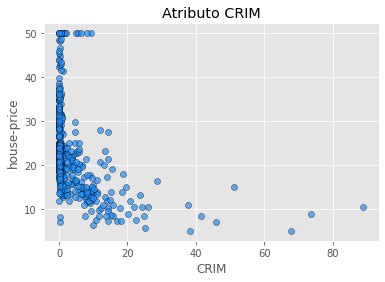

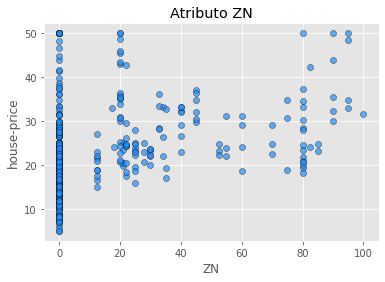

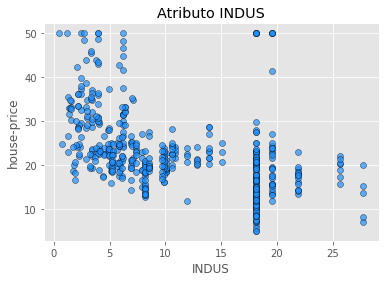

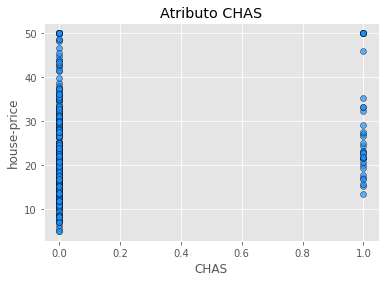

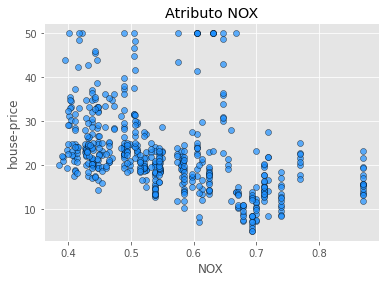

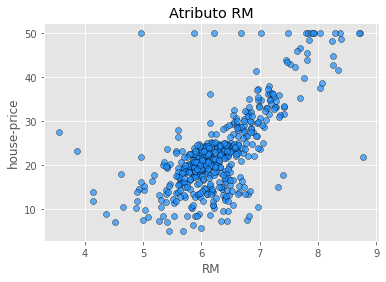

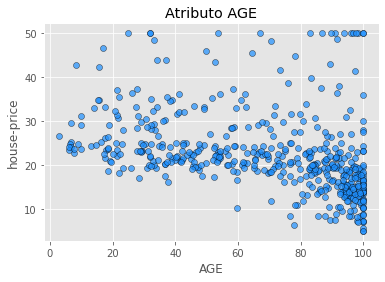

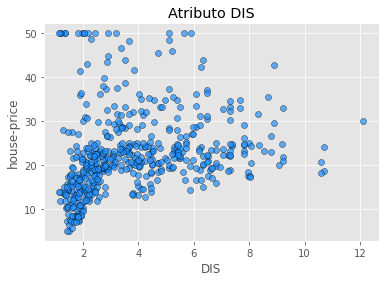

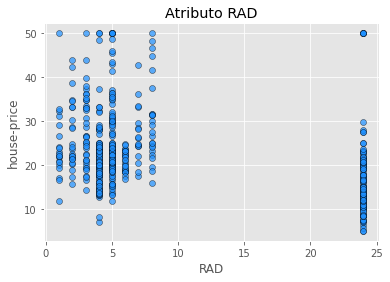

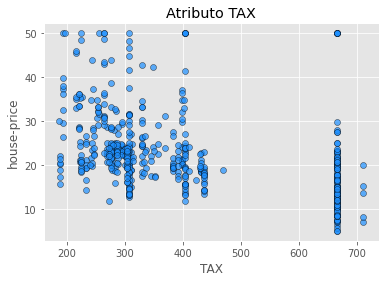

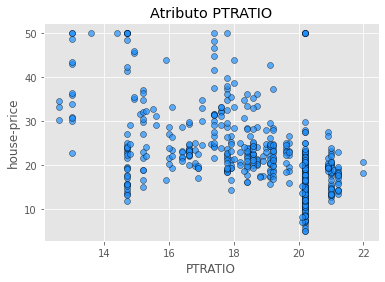

In [36]:
for i in list(boston['feature_names'][:-2]):
    selector = (boston['feature_names'] == i)
    plt.scatter(X[:, selector], y, facecolor="dodgerblue", alpha=0.7, edgecolor="k", label="datos")
    plt.ylabel('house-price')
    plt.xlabel(i)
    plt.title('Atributo '+i)
    plt.show()

- CRIM: Del gráfico de dispersión se observa que a medida que aumenta el crimen disminuyen los precios de las casas. 
- ZN: Del gráfico de dispersión se observa que a medida que aumenta la proporción de suelo residencial, los precios de las casas aumentan. 
- INDUS: Del gráfico de dispersión se observa que a medida que aumenta la proporción de hectáreas comerciales no minoristas por ciudad, disminuyen los precios de las casas. Aunque la relación no pareciera ser demasiado fuerte. 
- CHAS: No se observan diferencias en los precios de las casas entre aquellas que limitan con el río Charles y las que no limitan con el río. 
- NOX: Del gráfico de dispersión se observa que a medida que aumenta la concentración de óxido nítrico, disminuyen los precios de las casas. 
- RM: Del gráfico de dispersión se observa que a medida que aumenta la cantidad de cuartos, aumentan los precios de la casa. La relación es considerablemente fuerte. 
- AGE: Del gráfico de dispersión se observa que a medida que aumenta la proporción de unidades ocupadas por propietarios construidas antes de 1940, disminuyen los precios de las casas. La relación es levemente decreciente para el rango de AGE [0;80] y fuertemente decreciente para el rango de AGE [80;100].
- DIS: Del gráfico de dispersión se observa que a medida que aumentan las distancias ponderadas a cinco centros de empleo de Boston, aumentan los precios de las casas. El crecimiento de los precios es más pronunciado para distancias chicas y luego tienden a estabilizarse. 
- RAD: Del gráfico de dispersión se observa que no existe relación marcada entre el índice de accesibilidad a carreteras radiales y los precios de las casas para el rango [0;10] del índice de accesibilidad. Para índice de accesibilidad alto (cercano a 25) se detecta una disminución de los precios de las casas.  
- TAX: Del gráfico de dispersión se observa que a medida que aumenta la tasa de impuesto a la propiedad, disminuyen los precios de las casas. 
- PTRATIO: No se observa relación evidente entre la proporción de alumno-profesor por localidad y los precios de las casas. Quizá una relación negativa leve. 

A continuación analizamos los atributos sesgados:

**Atributo B**

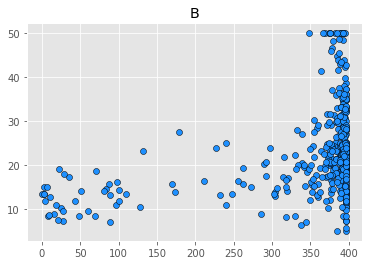

In [37]:
# Atributo B (eje y: MEDV, eje x: B)
feature = 'B'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

Del gráfico de dispersión se observa que a medida que aumenta B, aumentan los precios de las casas. 

**Atributo LSTAT**

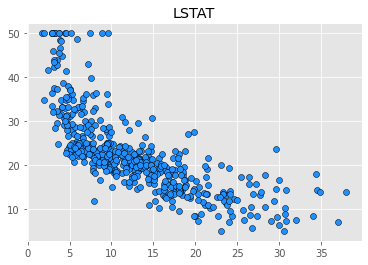

In [38]:
# Atributo LSTAT (eje y: MEDV, eje x: LSTAT)
feature = 'LSTAT'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

Se observa una marcada relación negativa entre el porcentaje de población de bajo estrato y el precio de las casas. A medida que aumenta la proporción de población de bajo estrato, disminuyen los precios de las casas. 

### Por observación de los gráficos de atributos consideramos que los más importantes para la predicción de precios de las casas son (en orden de importancia):

1. RM
2. CRIM
3. NOX
4. DIS

ya que presentan mayor correlación con el precio de las casas.

**Gráfico de los principales atributos por orden de importancia**

Text(0.5, 1.0, '4.DIS')

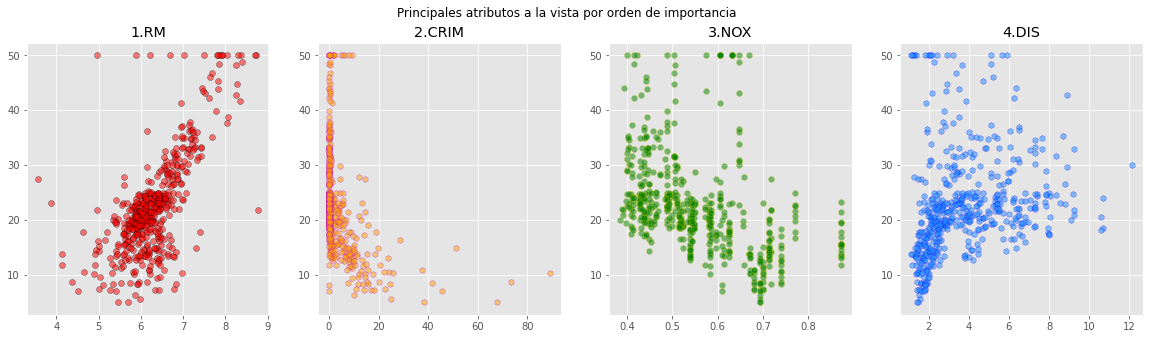

In [39]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
plt.style.use('ggplot')
fig.suptitle('Principales atributos a la vista por orden de importancia')
axs[0].scatter(X[:, boston['feature_names'] == 'RM' ], y, alpha=0.5, marker='o', facecolor="red", edgecolor="k")
axs[0].set_title("1.RM")
axs[1].scatter(X[:, boston['feature_names'] == 'CRIM' ], y, alpha=0.5, marker='h', facecolor="orange", edgecolor="m")
axs[1].set_title("2.CRIM")
axs[2].scatter(X[:, boston['feature_names'] == 'NOX' ], y, alpha=0.5, marker='o', facecolor="green", edgecolor="y")
axs[2].set_title("3.NOX")
axs[3].scatter(X[:, boston['feature_names'] == 'DIS' ], y, alpha=0.5, marker='h', facecolor="dodgerblue", edgecolor="b")
axs[3].set_title("4.DIS")

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

**Respuestas Ejercicio 3:**

1. Seleccionamos el atributo **RM: promedio de cuartos por vivienda**. Ya que en el análisis exploratorio mostró tener una fuerte relación con los precios de las casas. 

In [40]:
# 1. Seleccionamos el atributo RM
feature = 'RM' 
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape, y_train.shape, y_test.shape

((404, 1), (102, 1), (404,), (102,))

Instancia sklearn

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

2. A continuación instanciamos y entrenamos:

In [42]:
lr = LinearRegression()
lr.fit(X_train_f, y_train)

LinearRegression()

In [43]:
print(lr.coef_)
print(lr.intercept_)
print(lr.rank_)

[9.37638431]
-36.476189627647315
1


3. A continuación predecimos y evaluamos. Calculamos el error cuadrático medio sobre ambos conjuntos de datos.

In [44]:
y_train_pred = lr.predict(X_train_f)
y_test_pred = lr.predict(X_test_f)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

Error en datos de train: 42.82047894172751
Error en datos de test: 46.90735162739531


Se obtuvo un error en el conjunto test menor que 50.

4. Graficamos la función aprendida a partir de los datos de entrenamiento. También graficamos con los datos de evaluación para comparar.

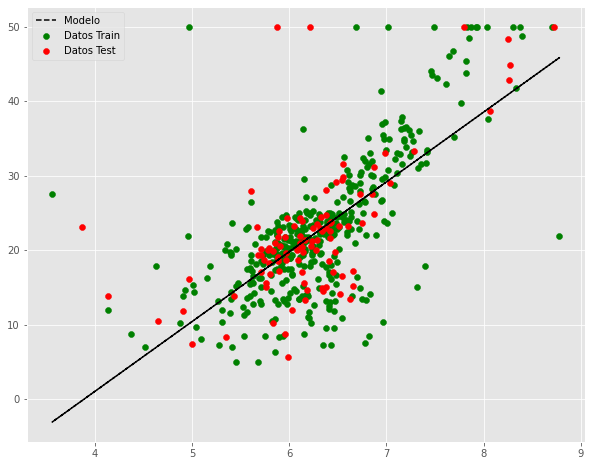

In [45]:
plt.figure(figsize = (10,8))
plt.scatter(X_train_f, y_train,  color='green', label = 'Datos Train')
plt.plot(X_train_f, y_train_pred, color='k', linestyle = '--', label = 'Modelo')
plt.scatter(X_test_f, y_test,  color='red', label = 'Datos Test')
plt.legend()
plt.show()

5. El modelo lineal ajustado para la variable dependiente **precios de las casas** y variable regresora **cantidad de cuartos** presenta un error en el conjunto de entrenamiento de aproximadamente 43 y un error en el conjunto de evaluación de aproximadamente 47. Teniendo en cuenta que dichos errores son cercanos, consideramos que no se está produciendo sobreajuste. Como paso a seguir debemos ajustar modelos polinómicos de diferentes grados para decidir si el modelo lineal propuesto logra el mejor ajuste o debemos elegir un modelo de mayor grado. 

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

**Respuestas Ejercicio 4:**

1. Para varios grados de polinomios:

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [47]:
# Probamos polinomios de varios grados, obteniendo valores de error en entrenamiento y evaluación:
train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    print("Grado:", degree, " Train Error:", train_error, " Test Error:", test_error,)
print("El polinomio que dio menor error en evaluacion es de grado {} con un error de {}".format(test_errors.index(min(test_errors)), min(test_errors)))


Grado: 0  Train Error: 85.1437202235075  Test Error: 81.58231743908232
Grado: 1  Train Error: 42.82047894172751  Test Error: 46.9073516273953
Grado: 2  Train Error: 37.74552897028125  Test Error: 39.794731163726546
Grado: 3  Train Error: 36.395658757671086  Test Error: 39.82576208821606
Grado: 4  Train Error: 34.808446256913214  Test Error: 41.553925676028065
Grado: 5  Train Error: 33.131121571949116  Test Error: 41.038288578720795
Grado: 6  Train Error: 33.13011641557084  Test Error: 41.0091769653148
Grado: 7  Train Error: 33.06035876459896  Test Error: 42.394110713112596
Grado: 8  Train Error: 33.06035722589541  Test Error: 42.39922618997137
Grado: 9  Train Error: 32.8548843047318  Test Error: 46.039030275360616
El polinomio que dio menor error en evaluacion es de grado 2 con un error de 39.794731163726546


2. Gráfico de las curvas de error en términos del grado del polinomio:

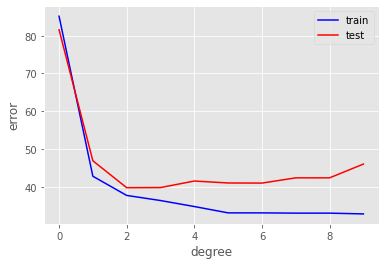

In [48]:
# Gráfico de las curvas de error en términos del grado del polinomio
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

3. Del gráfico de las curvas de error en términos del grado del polinomio concluimos que comienza a haber sobreajuste a partir del grado 3, ya que el error para el conjunto test comienza a aumentar. 

4. El modelo que mejor ajusta es el que tiene grado 2, ya que se minimizan los errores, tanto para el conjunto de entrenamiento (train) como para el conjunto de evaluación (test) y no se observa sobreajuste. 

In [49]:
# Mejor modelo (grado 2)
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train);

In [50]:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
x.shape

(200, 1)

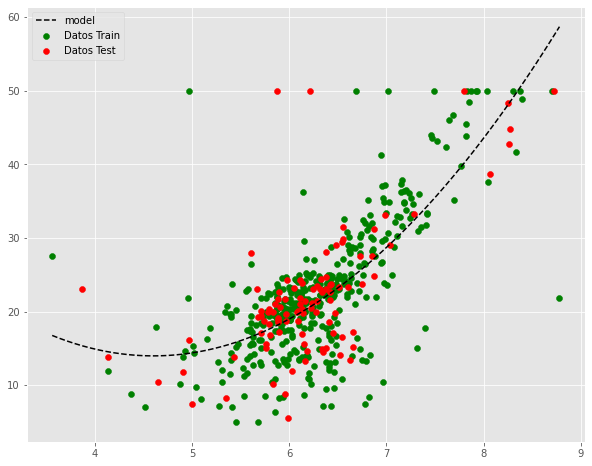

In [51]:
plt.figure(figsize = (10,8))
plt.scatter(X_train_f, y_train,  color='green', label = 'Datos Train')
plt.plot(x, model.predict(x.reshape(-1, 1)), color='k', linestyle = '--', label="model")
plt.scatter(X_test_f, y_test,  color='red', label = 'Datos Test')
plt.legend()
plt.show()

In [52]:
# Errores (grado 2)
train_errors[2], test_errors[2]

(37.74552897028125, 39.794731163726546)

El error del conjunto test es menor que 40.

5. Para el modelo de grado 2 (mejor modelo) se obtuvo un error en el conjunto de entrenamiento de aproximadamente 38 y un error en el conjunto de evaluación de aproximadamente 40. Ambos errores son menores a los errores del modelo lineal, con lo cual consideramos que el modelo de grado 2 ajusta mejor los datos que el modelo lineal, y también mejor que cualquier otro modelo de grado mayor que 2.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

**Respuestas Ejercicio 5:**

1. Seleccionamos los atributos **RM** y **CRIM**, ya que en el análisis exploratorio fueron los que mostraron mayor correlación con los precios de las casas. 

In [53]:
# 1. Seleccionamos los atributos RM y CRIM
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'CRIM')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

In [54]:
# Probamos polinomios de varios grados, obteniendo valores de error en entrenamiento y evaluación:
train_errors = []
test_errors = []
degrees = [1, 2, 3, 4, 5]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [55]:
# Errores
train_errors, test_errors

([36.241029348524556,
  24.47146756644073,
  21.270844974310258,
  19.892196995324507,
  18.572000422859283],
 [49.89554518799403,
  42.560077578201444,
  42.04441845417683,
  42.109087681830296,
  315.1538867298405])

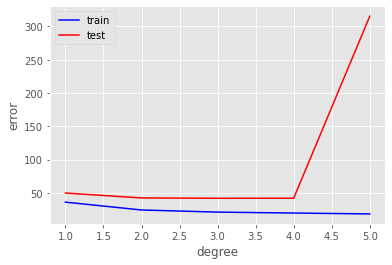

In [56]:
# Gráfico de las curvas de error en términos del grado del polinomio
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Del gráfico se concluye que el mejor modelo es el de grado 2, ya que a partir de ese grado se "estabilizan" tanto los errores de entrenamiento como los errores de evaluación (disminuyen, pero muy poco). A partir del grado 5 se pruduce sobreajuste.

In [57]:
# Mejor modelo (grado 2)
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train);

In [58]:
# Errores grado 2 (la entrada 1 corresponde al grado 2, ya que no se calculó el de grado cero)
train_errors[1], test_errors[1]

(24.47146756644073, 42.560077578201444)

3. La regresión ajustada considerando dos atributos (cantidad de cuartos y crimen) presenta mayor diferencia entre el error del conjunto de entrenamiento y el error del conjunto de evaluación (el error del conjunto de evaluación es mucho mayor al error del conjunto de entrenamiento), y el error del conjunto de evaluación para el modelo con dos atributos es mayor que el error del conjunto de evaluación para el modelo con un único atributo. Con lo cual concluimos que la variable CRIM está produciendo sobreajuste.



## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
